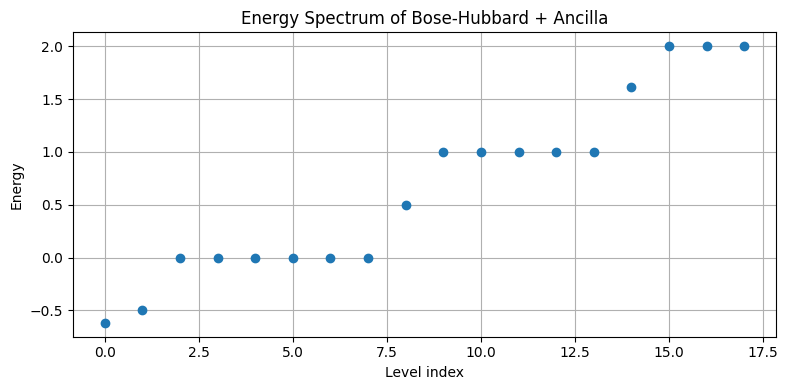

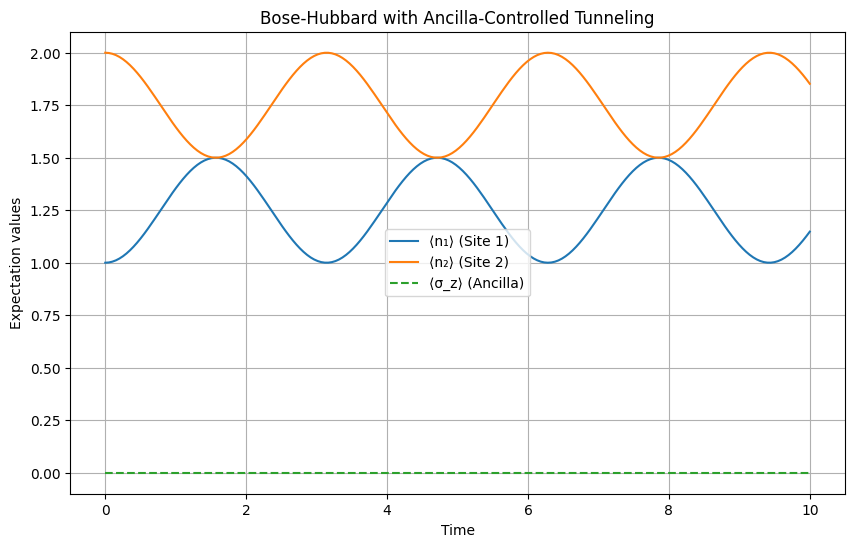

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# PARAMETERS
N = 3      # Number of Fock states (0, 1, 2 bosons)
q = 2      # Qubit dimension (|0>, |1>)
U = 1.0    # On-site interaction strength
J = 0.5    # Tunneling strength
tlist = np.linspace(0, 10, 200)  # Time evolution range

# OPERATORS
# Annihilation operators for site 1 and 2
a1 = tensor(destroy(N), qeye(N), qeye(q))  # site 1
a2 = tensor(qeye(N), destroy(N), qeye(q))  # site 2

# Number operators
n1 = a1.dag() * a1
n2 = a2.dag() * a2

# Ancilla qubit Pauli-Z operator
sigma_z_anc = tensor(qeye(N), qeye(N), sigmaz())

# Projector onto ancilla = |1>
P1 = tensor(qeye(N), qeye(N), basis(q, 1) * basis(q, 1).dag())

# HAMILTONIAN
# Interaction term
H_U = (U / 2) * (n1 * (n1 - 1) + n2 * (n2 - 1))

# Controlled tunneling term (only happens if ancilla is |1>)
H_tunnel = -J * (a1.dag() * a2 + a2.dag() * a1) * P1

# Total Hamiltonian
H = H_U + H_tunnel

# Eigenenergies of H
energies = H.eigenenergies()
plt.figure(figsize=(8,4))
plt.plot(energies, 'o')
plt.title("Energy Spectrum of Bose-Hubbard + Ancilla")
plt.xlabel("Level index")
plt.ylabel("Energy")
plt.grid(True)
plt.tight_layout()
plt.show()






# Site 1 = 1 boson, Site 2 = 2 bosons
psi_site1 = basis(N, 1)
psi_site2 = basis(N, 2)

# Ancilla in superposition: (|0> + |1>) / sqrt(2)
psi_ancilla = (basis(q, 0) + basis(q, 1)).unit()

# Full system initial state
psi0 = tensor(psi_site1, psi_site2, psi_ancilla)

# No collapse operators → closed system
c_ops = []

# Track: boson numbers and ancilla z
e_ops = [n1, n2, sigma_z_anc]

# Solve the Schrödinger equation
result = mesolve(H, psi0, tlist, c_ops, e_ops)

plt.figure(figsize=(10, 6))
plt.plot(tlist, result.expect[0], label="⟨n₁⟩ (Site 1)")
plt.plot(tlist, result.expect[1], label="⟨n₂⟩ (Site 2)")
plt.plot(tlist, result.expect[2], label="⟨σ_z⟩ (Ancilla)", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.title("Bose-Hubbard with Ancilla-Controlled Tunneling")
plt.legend()
plt.grid(True)
plt.show()
